# Sales Analysis Project for 12 month of data

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

###### Task1: Merge 12months of sales data into  a single csv file

In [2]:
pd.set_option('mode.chained_assignment', None)
df = pd.read_csv('./Sales_Data/Sales_August_2019.csv')
# Read all the files in the Sales_Data dir.
files = [file for file in os.listdir('./Sales_Data') ]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
    
# all_months_data.to_csv("all_sales_2019", index=False)


### Clean up the data

In [3]:
all_months_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
all_months_data[all_months_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_months_data.dropna(inplace=True)

In [6]:
all_months_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
# Some Order date data are not in date form.

all_months_data[all_months_data["Order Date"].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Drop rows without order date
all_months_data = all_months_data[all_months_data["Order Date"].str[0:2] != 'Or']

###### Convert column to the correct type

In [9]:
all_months_data["Quantity Ordered"] = pd.to_numeric(all_months_data["Quantity Ordered"])
all_months_data["Price Each"] = pd.to_numeric(all_months_data["Price Each"])

### Augument Data with additional columns

###### Task2: Add month Column

In [10]:
all_months_data["Month"] = all_months_data["Order Date"].str[0:2]
all_months_data["Month"] = all_months_data["Month"].astype('int32')

In [11]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


###### Task 3: Add a sales column

In [12]:
all_months_data["Sales"] = all_months_data["Quantity Ordered"] * all_months_data["Price Each"]

###### Task 4: Add a city column

In [13]:
# Get City name with State attached to it. 
all_months_data["City"] = (all_months_data["Purchase Address"].str.split(",",expand=True)[1] + '(' +                        
all_months_data["Purchase Address"].str.split(",",expand=True)[2].str.split(" ",expand=True)[1] + ')')

                          

### Question 1: What is the best month for sale? How much was earned that month?

In [14]:
sales_result = all_months_data.groupby("Month").sum()

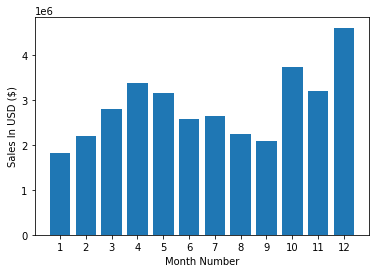

In [15]:
months = range(1,13)
plt.bar(months,sales_result['Sales'])
plt.xticks(months)
plt.ylabel("Sales In USD ($)")
plt.xlabel("Month Number")
plt.show()

### Question 2: What City had the highest number of sales?

In [16]:
city_sales_result = all_months_data.groupby("City").sum()

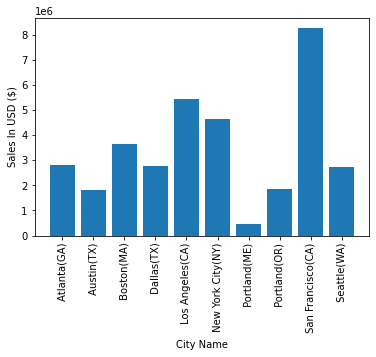

In [17]:
cities =[city for city, df in all_months_data.groupby("City")]
plt.bar(cities,city_sales_result['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel("Sales In USD ($)")
plt.xlabel("City Name")
plt.show()

### Question 3: What time of day should advert b display to increase the likelyhood of a customer buying?

In [18]:
# Convert order date to pandas date_time

all_months_data["Order Date"] = pd.to_datetime(all_months_data["Order Date"])

In [19]:
# Create a hour column
all_months_data["Hour"] = all_months_data["Order Date"].dt.hour

# Creeate a Minute column
all_months_data["Minute"] = all_months_data["Order Date"].dt.minute

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


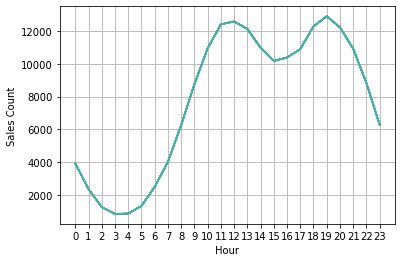

In [20]:
hours =[hour for hour, df in all_months_data.groupby("Hour")]
plt.plot(hours,all_months_data.groupby("Hour").count())
plt.xticks(hours)
plt.ylabel("Sales Count")
plt.xlabel("Hour")
plt.grid()
plt.show()

### Question 4: What Products are most often sold together

In [31]:
# Products ordered together has same order id
df = all_months_data[all_months_data['Order ID'].duplicated(keep= False)]
df["Grouped"] = df.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [39]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What Product sold the most and why?

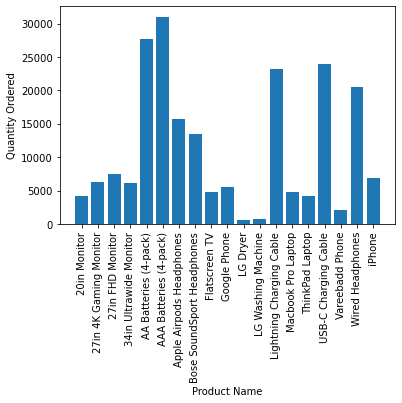

In [45]:
product_group = all_months_data.groupby("Product")
quantity_ordered =product_group.sum()["Quantity Ordered"]

products =[product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.ylabel("Quantity Ordered")
plt.xlabel("Product Name")
plt.show()

<ipython-input-49-6c5aa0162260>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


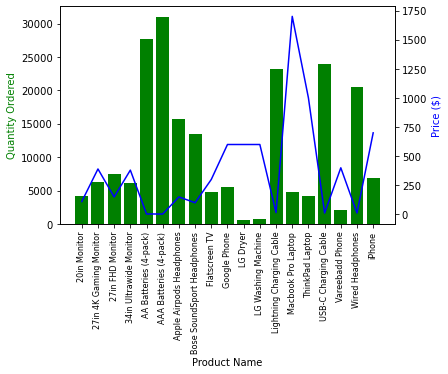

In [49]:
# Check if price is a factor
prices = all_months_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()